In [2]:
cd deep-belief-network

C:\Users\SUNNY\All_Codes\TimeSeries_ANN\deep-belief-network


In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
np.random.seed(1337)  # for reproducibility
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from dbn import SupervisedDBNRegression


In [16]:
import seaborn as sns

In [5]:
np.seterr(over='ignore')
pd.set_option('display.max_columns', None)

In [6]:
data = '../QoS/qos_cleaned.csv'
df = pd.read_csv(data, nrows=100)

In [ ]:
df.describe()

In [7]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
df.describe()

<AxesSubplot:>

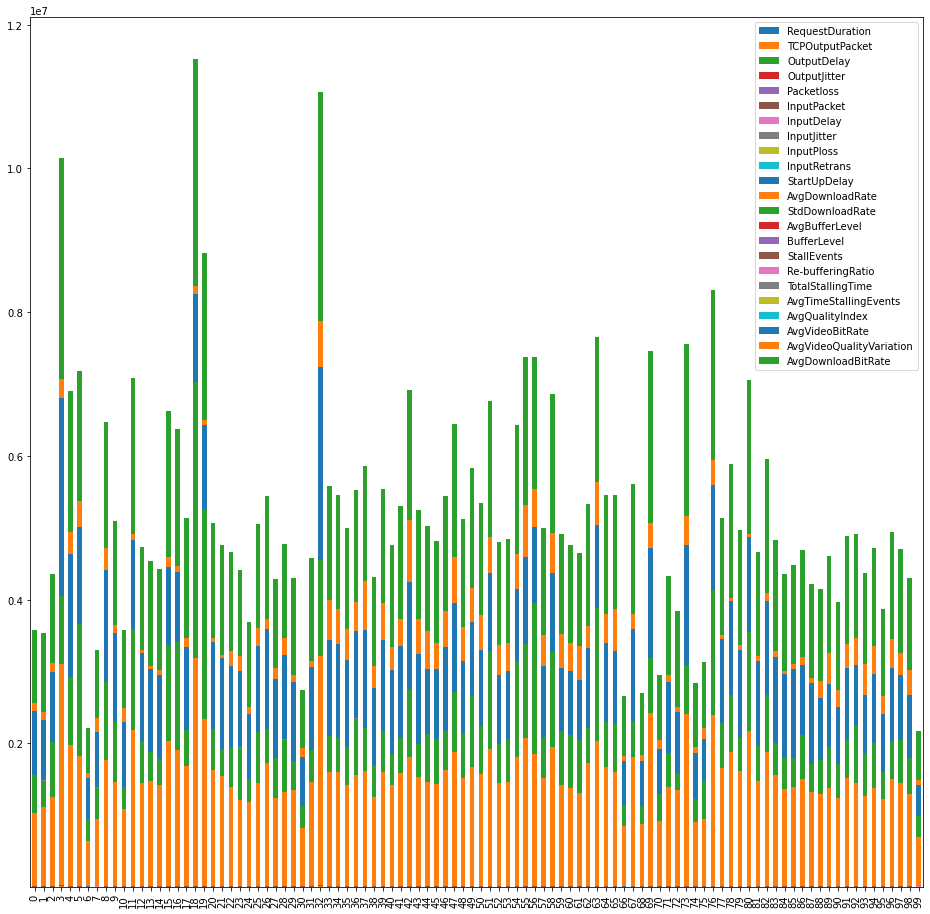

In [10]:
df.plot.bar(stacked=True, figsize=(16, 16))

<AxesSubplot:>

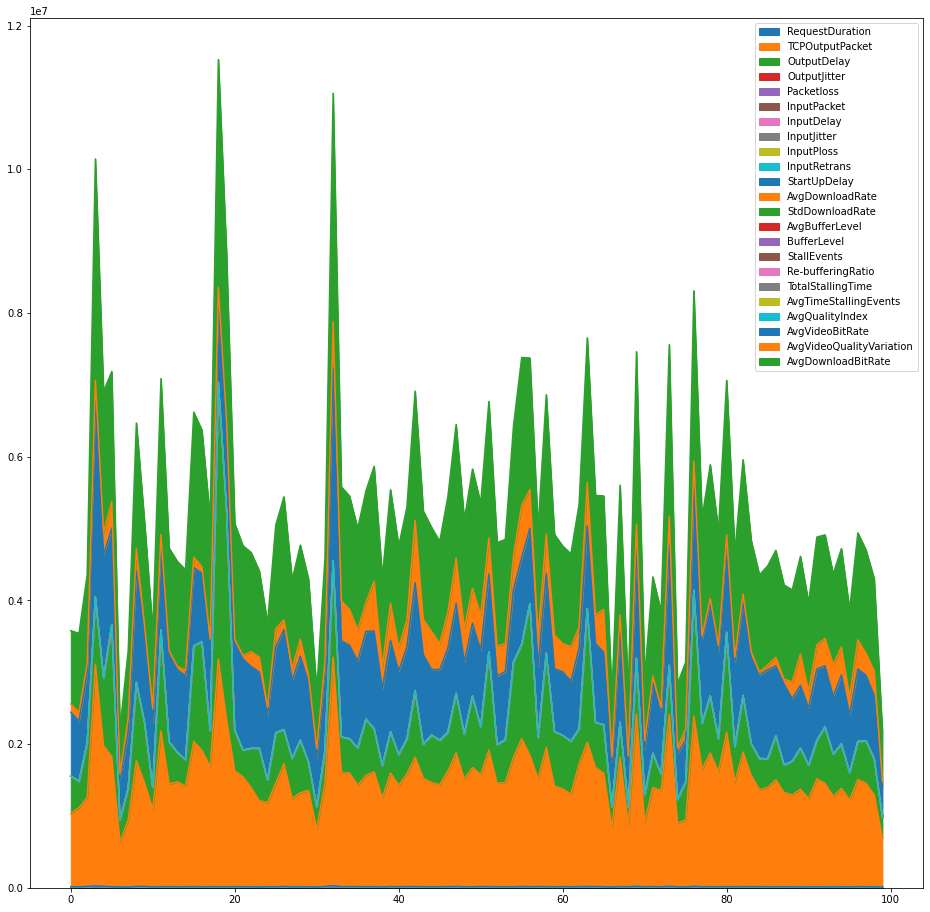

In [11]:
df.plot.area(figsize=(16, 16))

<AxesSubplot:>

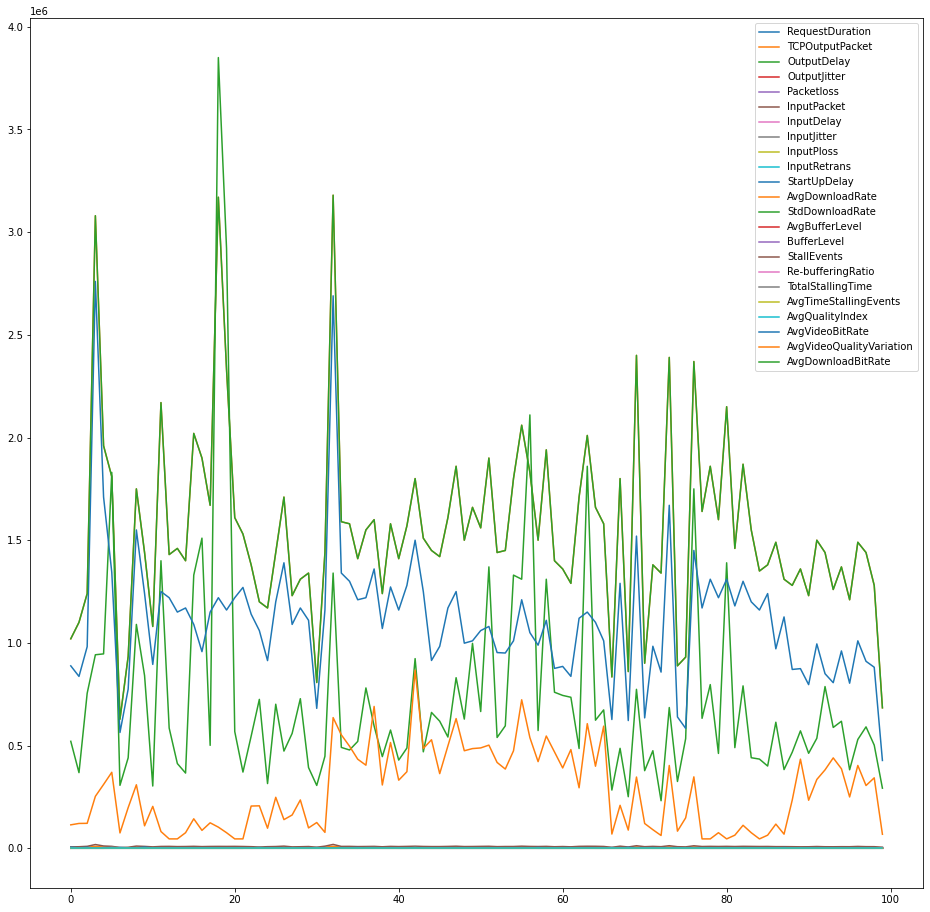

In [12]:
df.plot.line(figsize=(16, 16))

In [ ]:
columns = ['OutputJitter', 'Packetloss', 'InputJitter', 'InputPloss', 'InputRetrans']

In [68]:
columns = ['TCPOutputPacket', 'OutputDelay', 'OutputJitter', 'Packetloss', 'InputPacket', 'InputDelay', 'InputJitter', 'InputPloss', 'InputRetrans']

In [17]:
X = df[columns]

In [18]:
Y = df['StartUpDelay'].values

In [61]:
df.describe()

,RequestDuration,TCPOutputPacket,OutputDelay,OutputJitter,Packetloss,InputPacket,InputDelay,InputJitter,InputPloss,InputRetrans,StartUpDelay,AvgDownloadRate,StdDownloadRate,AvgBufferLevel,BufferLevel,StallEvents,Re-bufferingRatio,TotalStallingTime,AvgTimeStallingEvents,AvgQualityIndex,AvgVideoBitRate,AvgVideoQualityVariation,AvgDownloadBitRate
count,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,1.000000e+02,100.000000,1.000000e+02
mean,70.0,4811.220000,11.243056,0.003141,0.009291,8678.790000,128.694034,1.336083,0.011010,9.200000,1602.890000,1.550681e+06,7.419292e+05,9.297343,3.928802,0.450000,0.007243,507.000000,15.893407,0.670487,1.109396e+06,280105.020000,1.550681e+06
std,0.0,1041.282218,8.406442,0.000759,0.007766,2008.385196,122.351710,0.417449,0.007407,8.642156,1056.353418,4.532084e+05,5.394362e+05,4.264368,1.265135,0.891883,0.018037,1262.613531,40.382974,0.076525,3.305741e+05,195247.722266,4.532084e+05
min,70.0,2151.000000,1.042200,0.001386,0.000000,3953.000000,25.177200,0.929144,0.000165,2.000000,338.000000,6.285660e+05,2.314720e+05,1.294120,1.148560,0.000000,0.000000,0.000000,0.000000,0.471429,4.275200e+05,45628.200000,6.285660e+05
25%,70.0,4381.000000,1.043055,0.002714,0.000000,7732.750000,38.159525,1.105028,0.003317,4.000000,829.750000,1.332500e+06,4.622690e+05,4.900175,3.297555,0.000000,0.000000,0.000000,0.000000,0.631462,9.142662e+05,95806.050000,1.332500e+06
50%,70.0,4904.500000,11.042950,0.002969,0.009503,8626.000000,51.456000,1.138340,0.010272,6.000000,1338.000000,1.475000e+06,5.745030e+05,11.000000,4.121820,0.000000,0.000000,0.000000,0.000000,0.676471,1.110000e+06,249034.000000,1.475000e+06
75%,70.0,5233.000000,21.042900,0.003370,0.017495,9239.250000,292.085250,1.487933,0.018903,12.250000,1964.250000,1.720000e+06,7.823072e+05,12.542875,4.665810,1.000000,0.002857,200.000000,6.060610,0.716072,1.225000e+06,424804.750000,1.720000e+06
max,70.0,9485.000000,31.044500,0.006170,0.022218,18704.000000,310.739000,2.907850,0.024435,52.000000,5259.000000,3.180000e+06,3.850000e+06,17.714300,7.606660,5.000000,0.095714,6700.000000,223.333000,0.900000,2.760000e+06,867200.000000,3.180000e+06


In [63]:
qoe = [ 'StartUpDelay', 'AvgDownloadRate', 'StdDownloadRate', 'AvgBufferLevel', 'BufferLevel', 'StallEvents', 'Re-bufferingRatio', 'TotalStallingTime', 'AvgTimeStallingEvents', 'AvgQualityIndex', 'AvgVideoBitRate', 'AvgVideoQualityVariation', 'AvgDownloadBitRate']

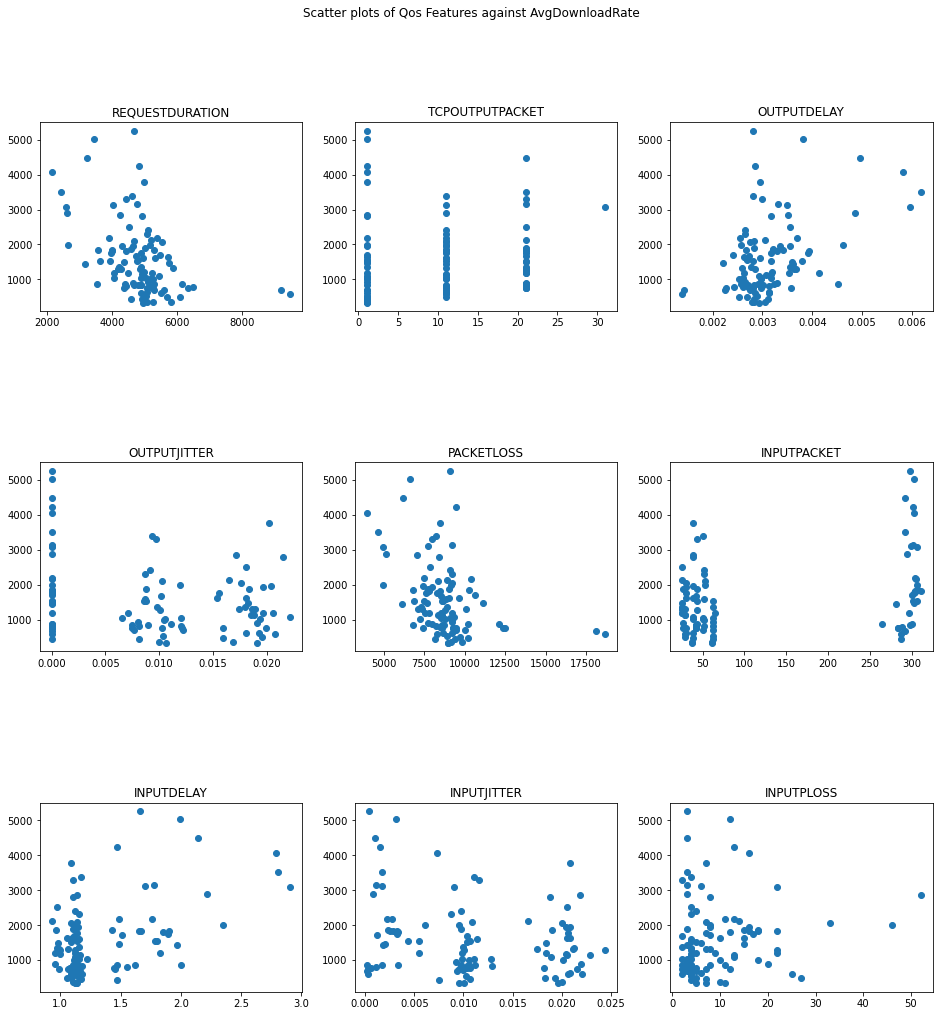

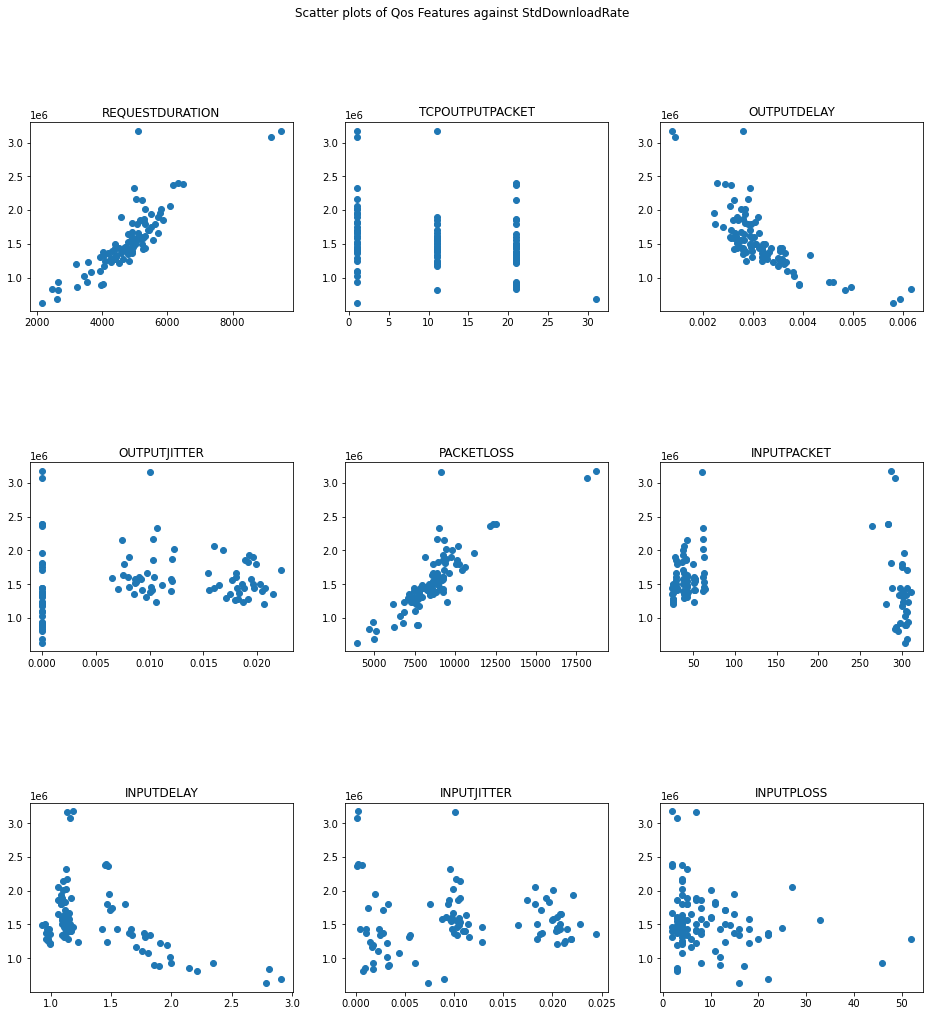

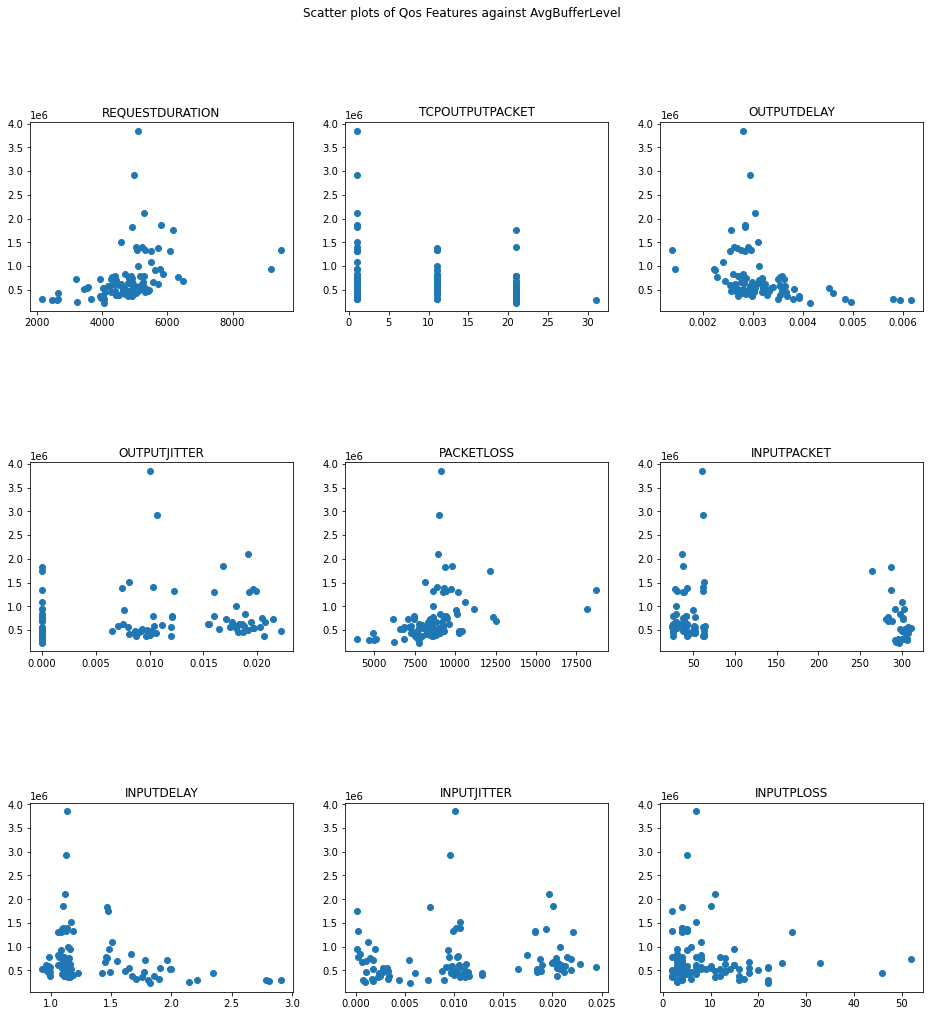

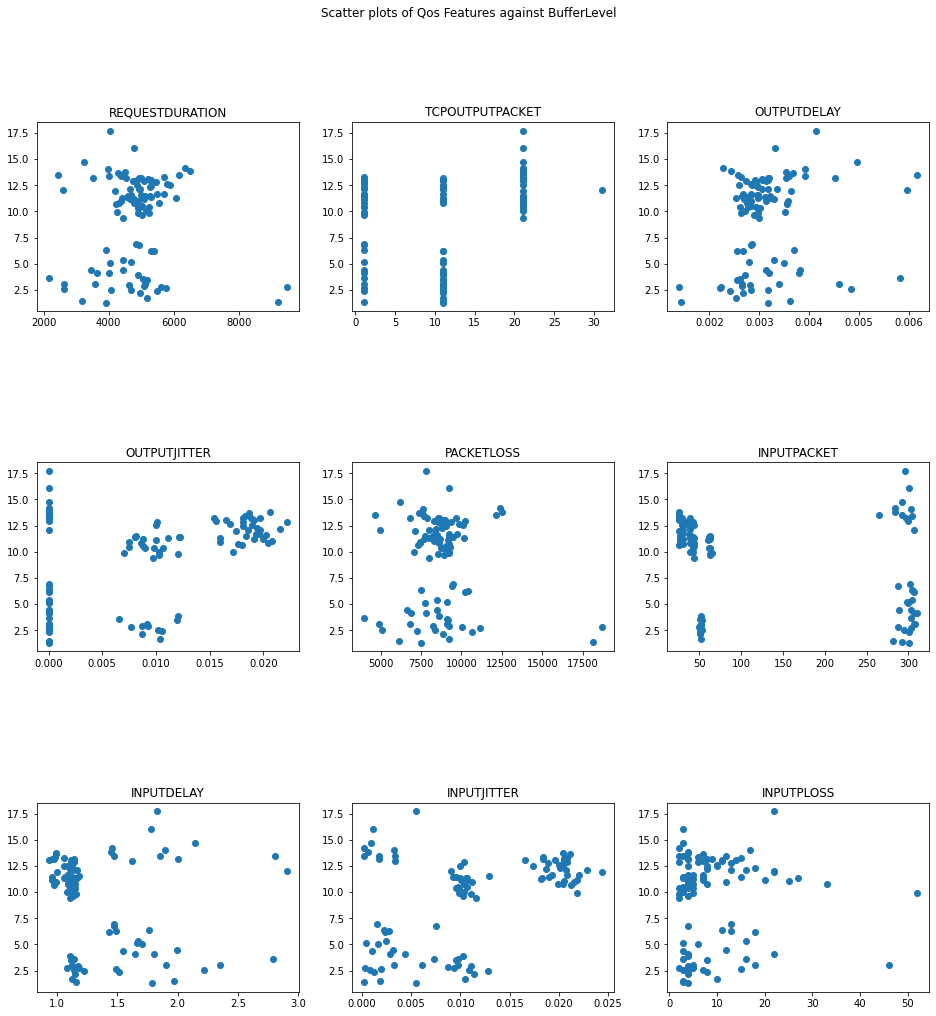

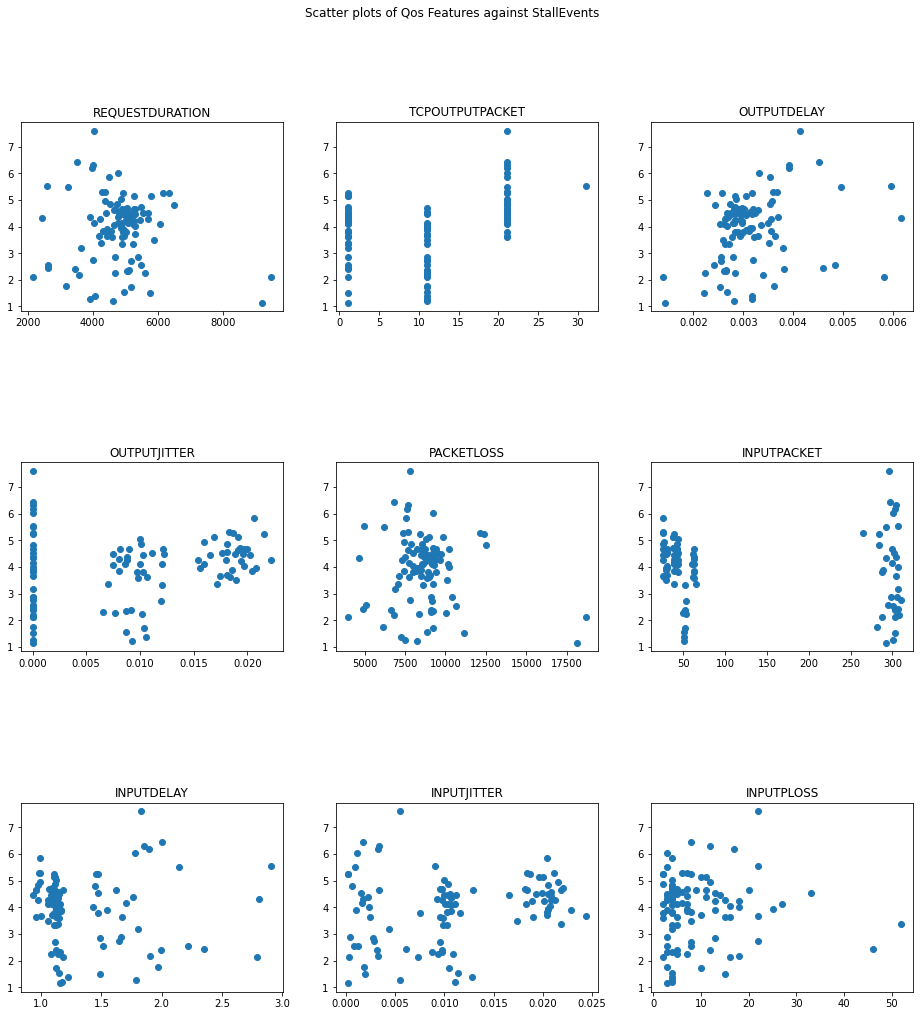

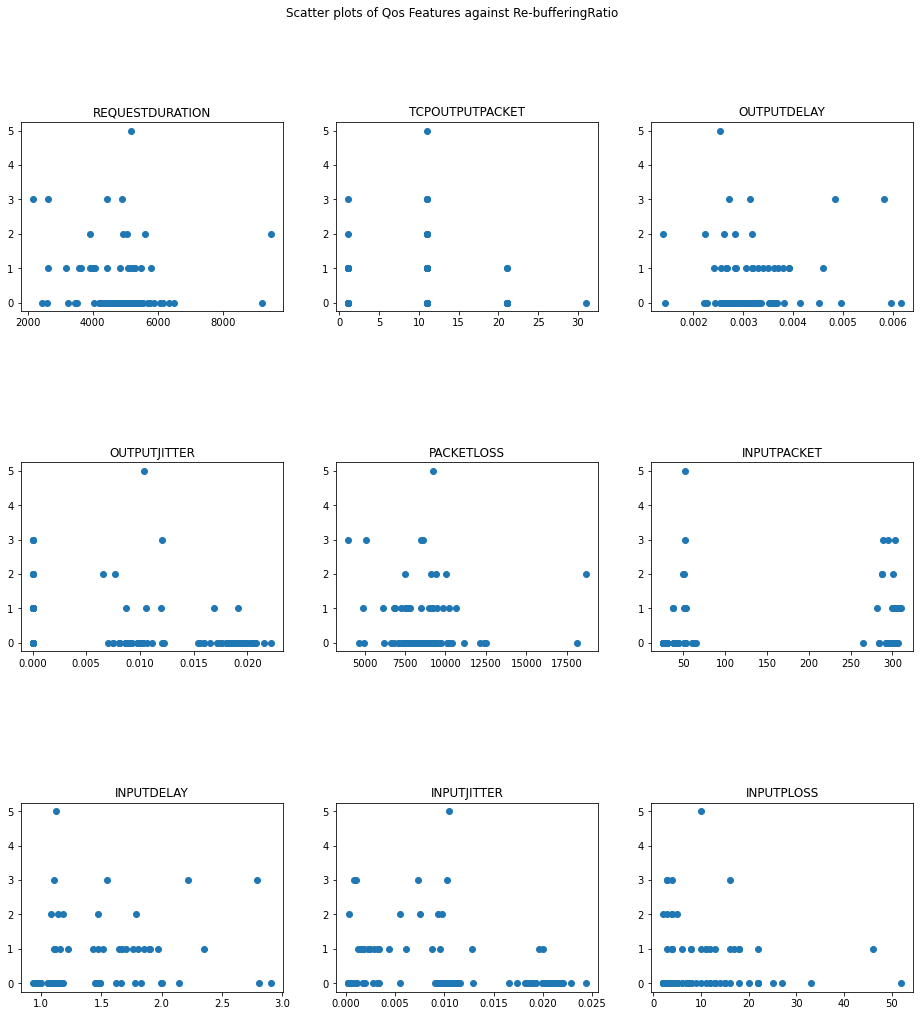

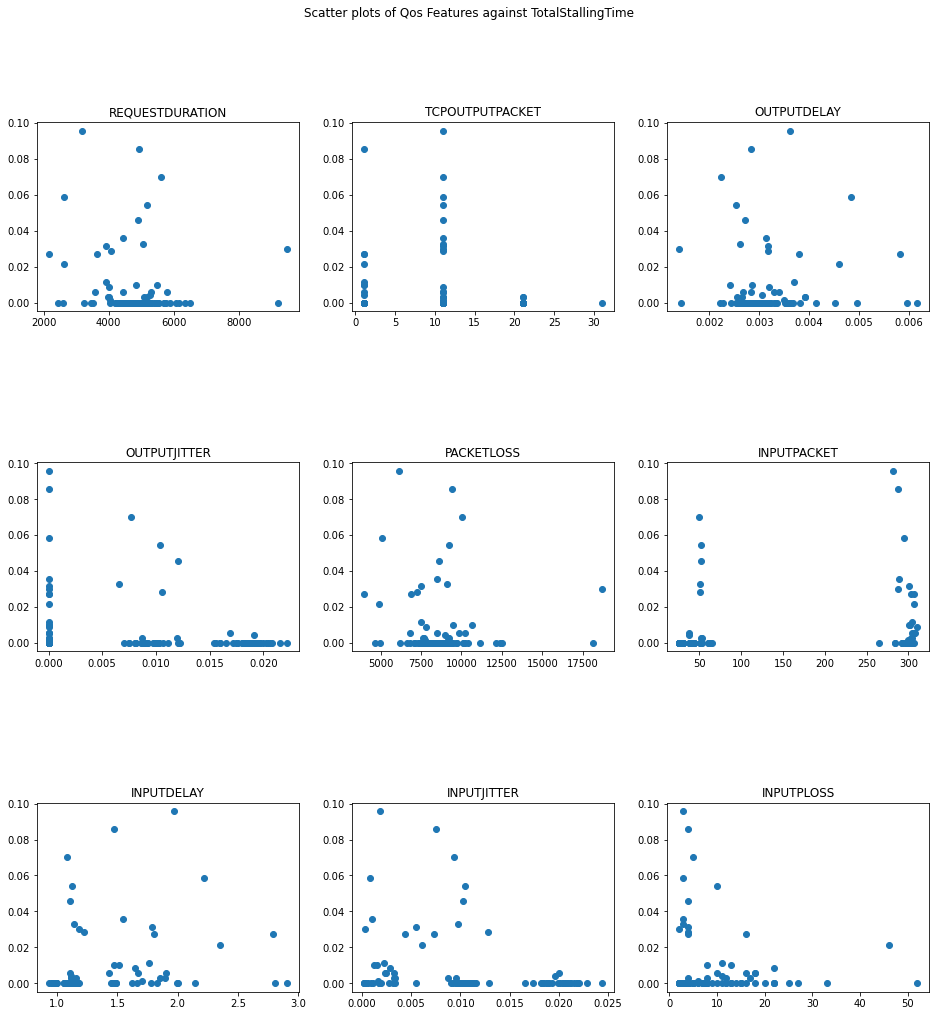

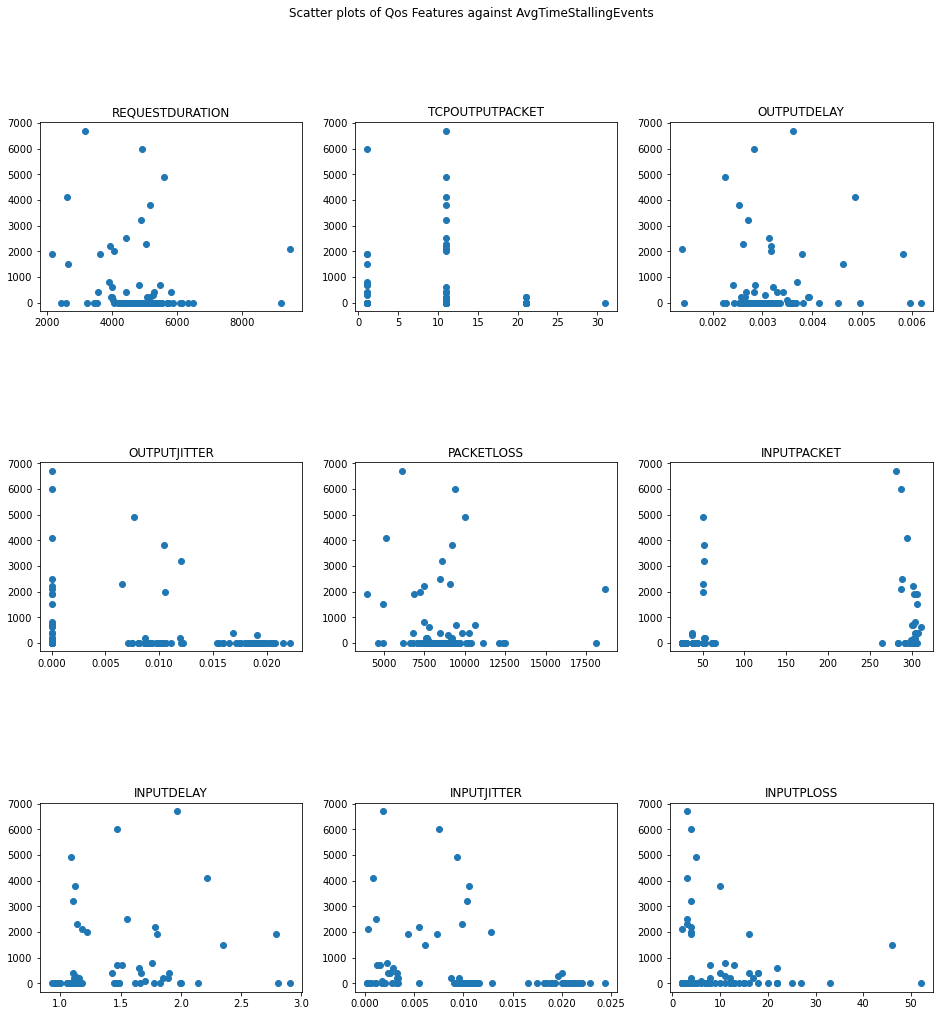

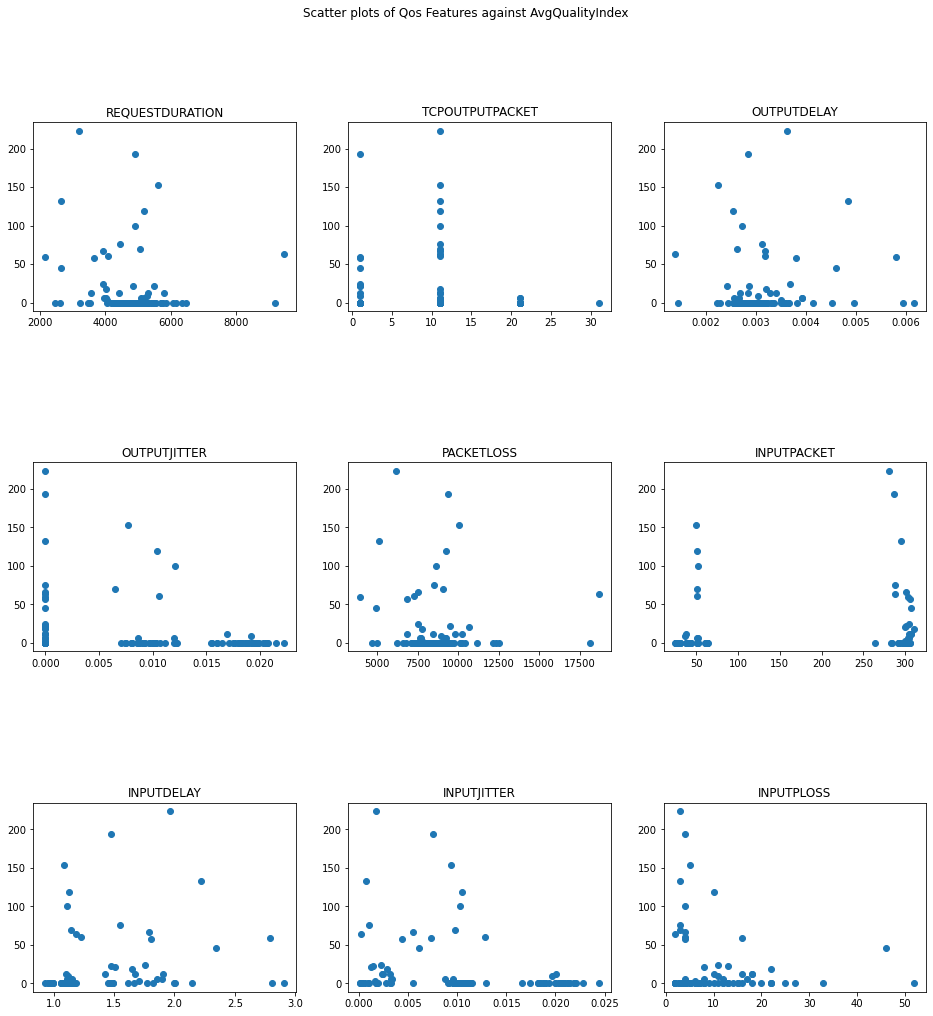

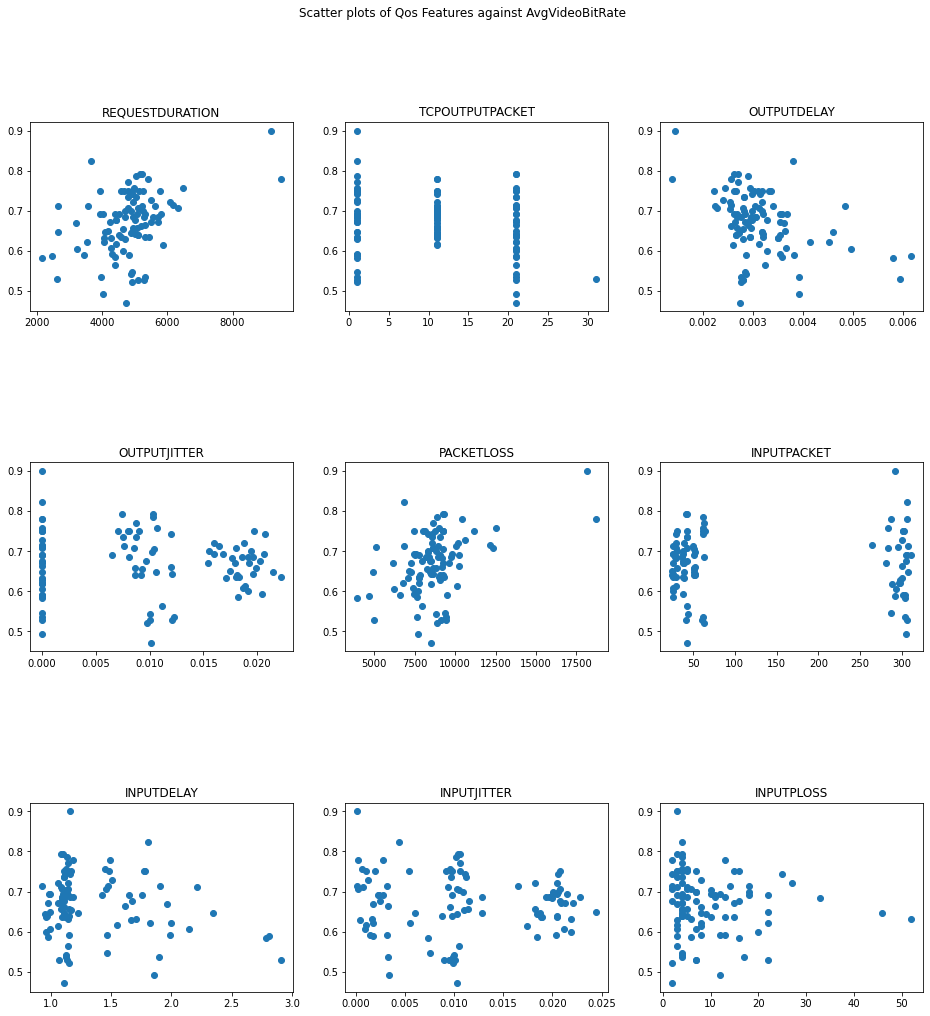

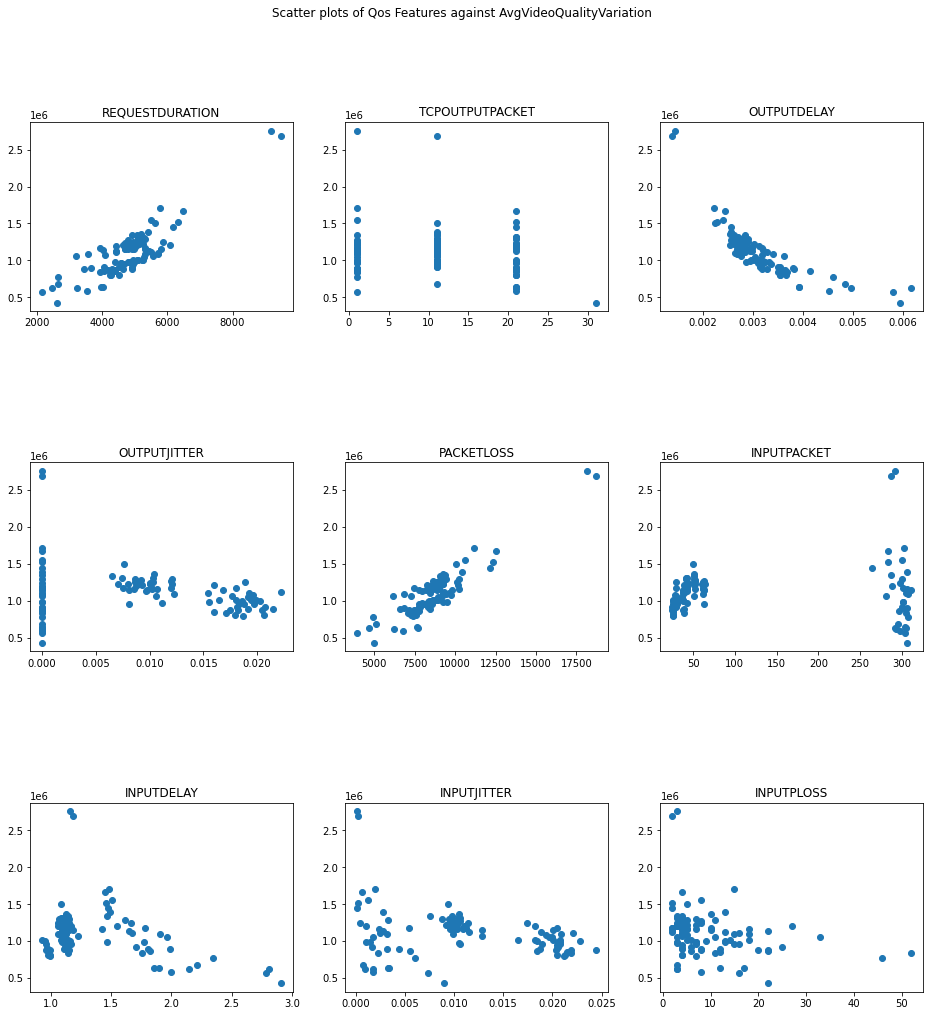

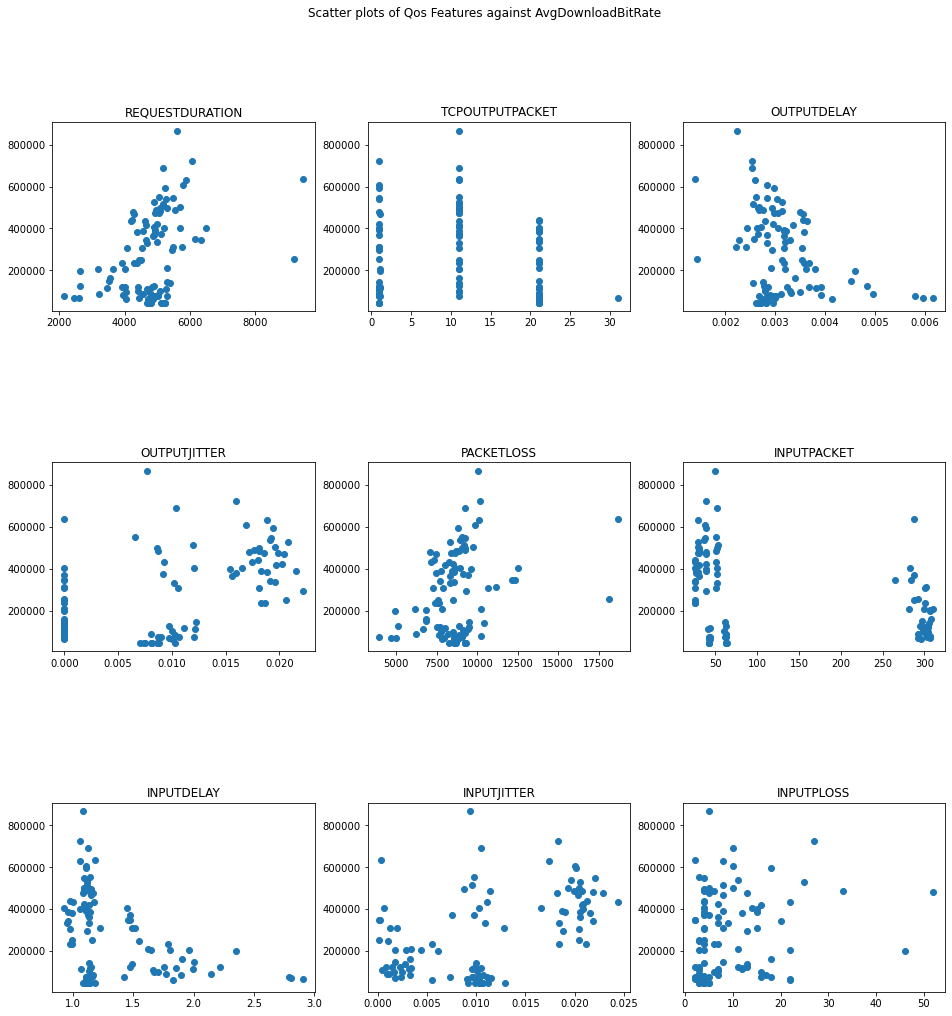

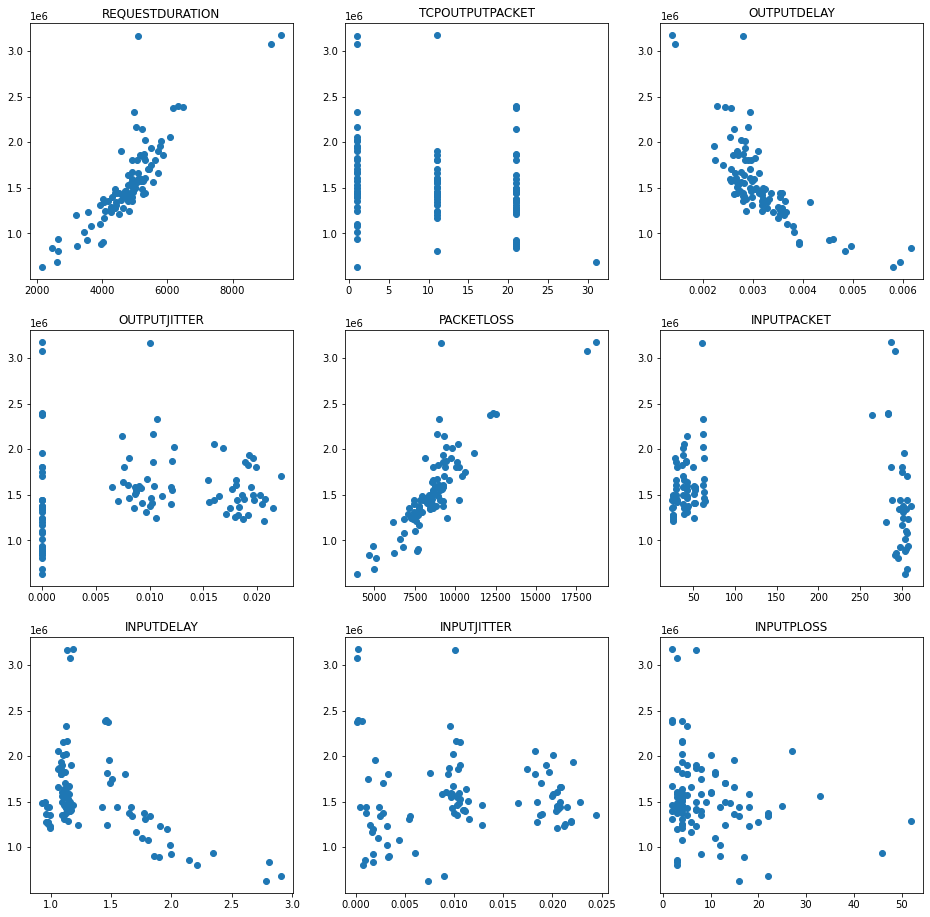

In [73]:
for col in qoe:
    
    fig.subplots_adjust(hspace=0.8)
    fig.suptitle(f'Scatter plots of Qos Features against {col}')
    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 16))

    for ax, feature, name in zip(axes.flatten(), X.values.T, df.columns.values):
        ax.scatter(x=feature, y=df[col].values.T)
        ax.set(title=name.upper())
    plt.savefig(f'../QoS/images/{col}.png')
  

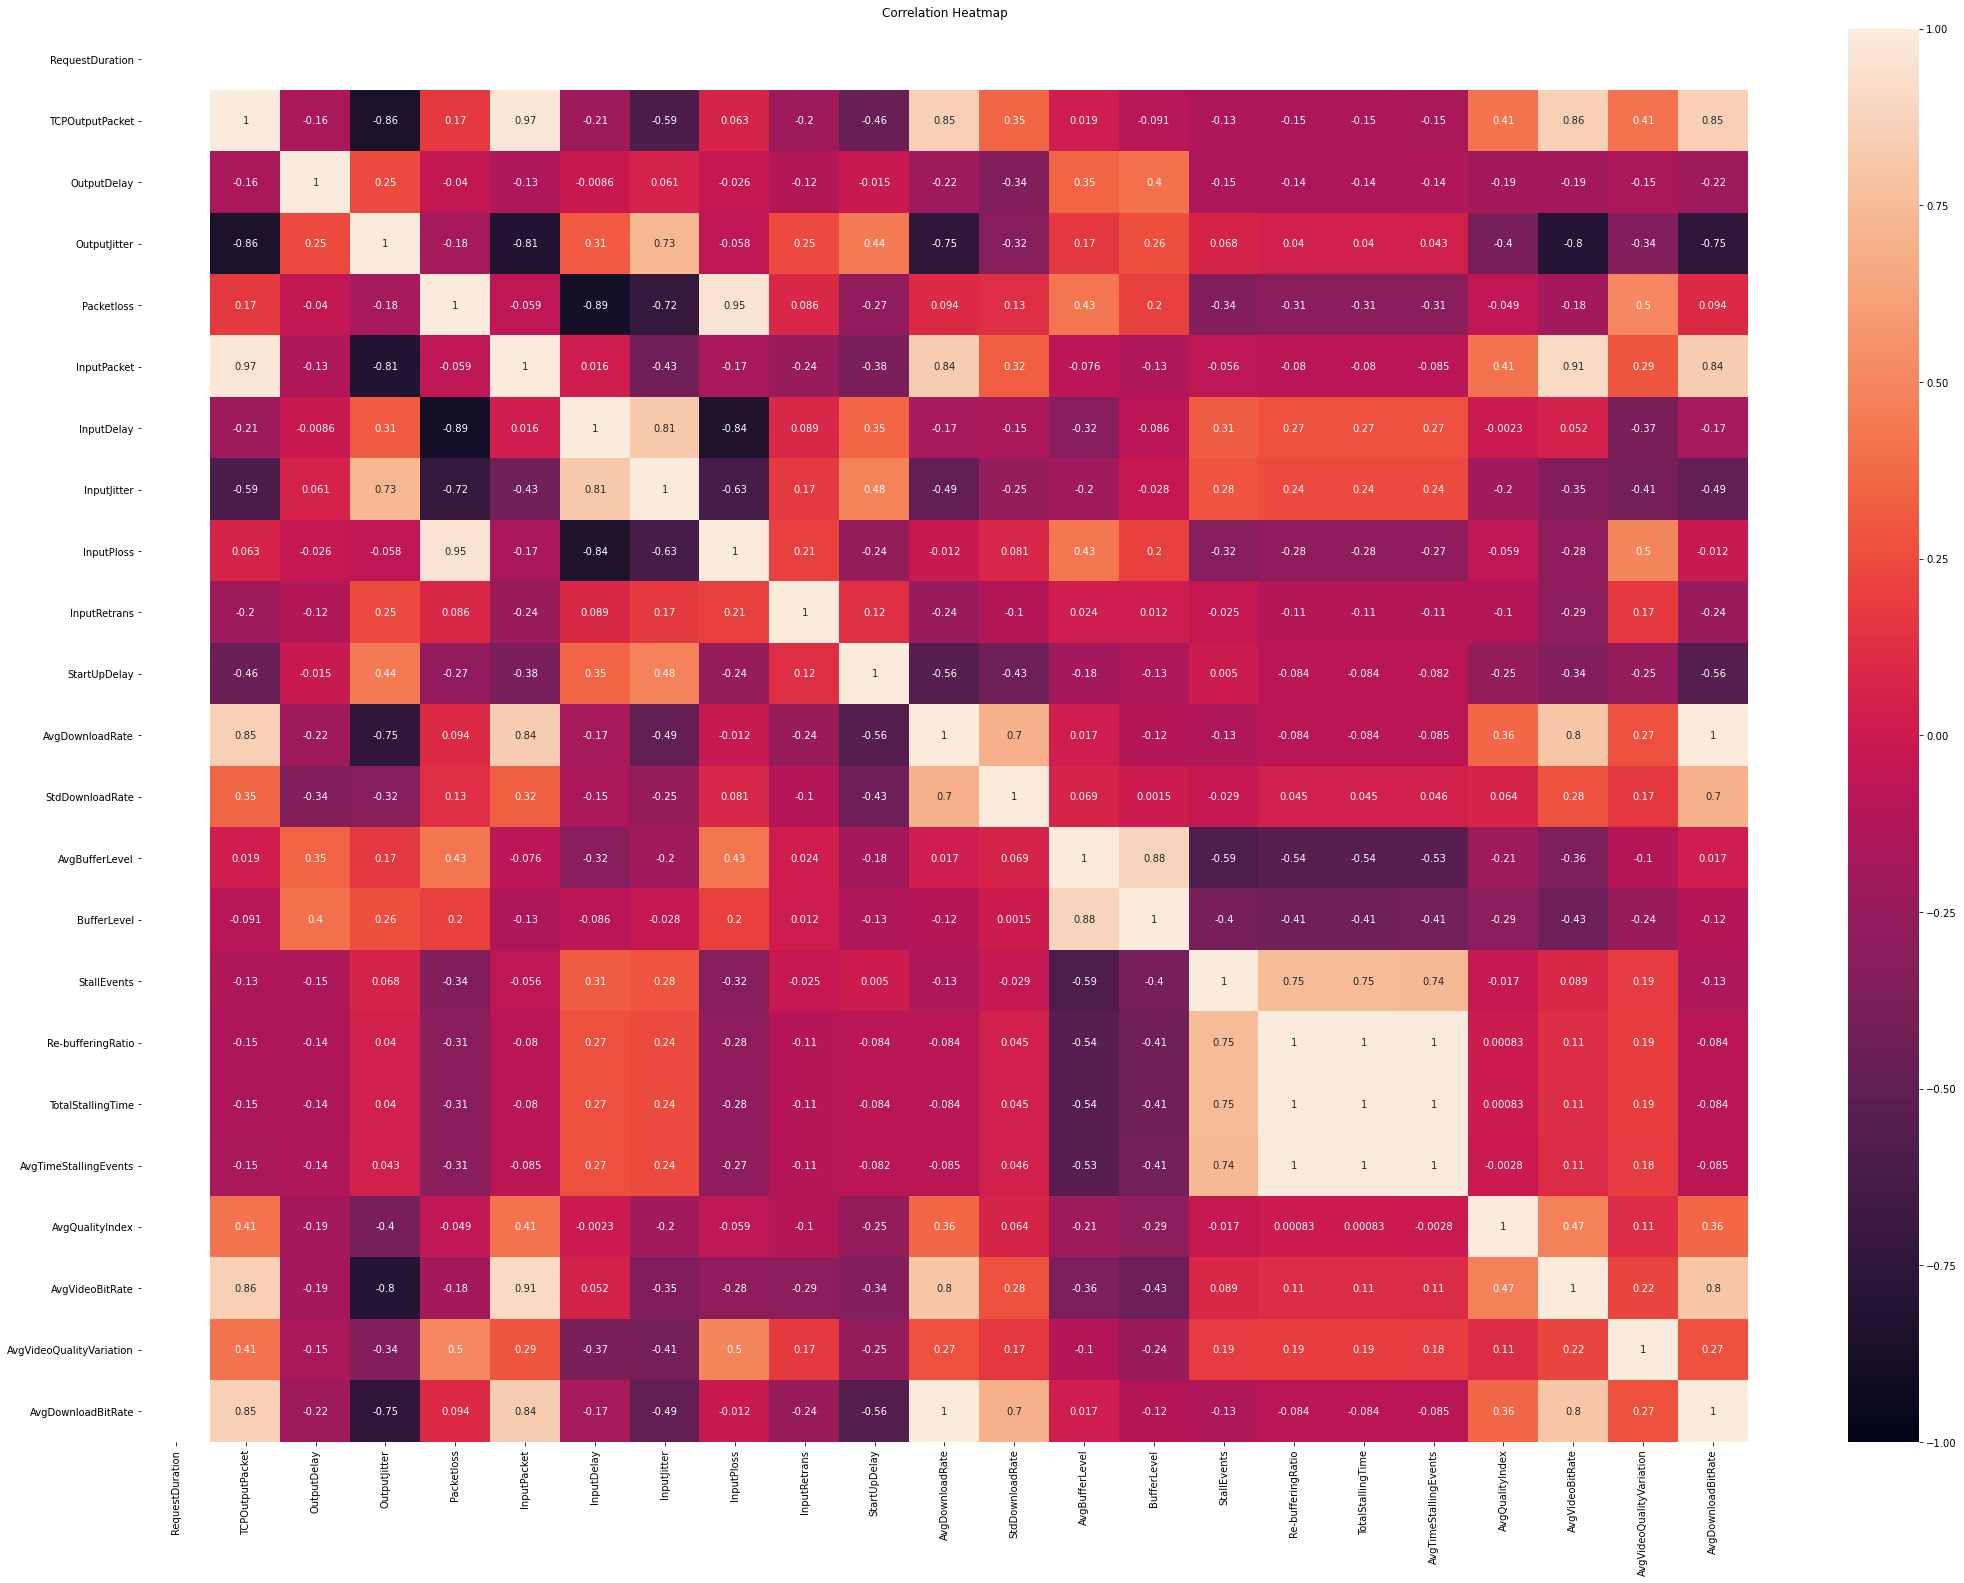

In [78]:
plt.figure(figsize=(36, 26))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)
plt.savefig('../QoS/images/correlation_marix.png')


In [ ]:
Y = df['StartUpDelay'].values

In [ ]:

# Splitting data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=24)


In [ ]:
# Data scaling
min_max_scaler = MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)


In [ ]:

# Training
regressor = SupervisedDBNRegression(hidden_layers_structure=[100],
                                    learning_rate_rbm=0.01,
                                    learning_rate=0.00001,
                                    n_epochs_rbm=20,
                                    n_iter_backprop=200,
                                    batch_size=20,
                                    activation_function='relu')

In [ ]:
regressor.fit(X_train, Y_train)

In [ ]:
# Test
X_test = min_max_scaler.transform(X_test)

In [ ]:
Y_pred = regressor.predict(X_test)

In [ ]:

print('Done.\nR-squared: %f\nMSE: %f' % (r2_score(Y_test, Y_pred), mean_squared_error(Y_test, Y_pred)))


In [ ]:
Y_pred